# Labo FUGE - Exercises

The aim of this labo is to explore the use of FUGE as a modelling tool for selecting and characterizing diagnostic biomarkers.

## Exploring the fitness (performance) configuration

In this part you are going to select the weights (relative importance) of 4 performance criteria (the most common and useful ones) used in FUGE. For this purpose you are provided with two scripts (to be executed from FUGE): 
- DS_conf.fs: exploration of two trade-offs: 
-- numeric (RMSE) versus diagnostic (Sens/Spec) and 
-- Sensitivity versus Specificity
- DS_size.fs: exploration of a fitness penalizing the size/complexity of the models
<p>(Note: A third script, DS_Sen_Spe, may be used to further explore the sensitivity versus specificity trade-off)

Don't forget to control in the script that all the parameters are correctly configured according to the problem under study (<i>in particular those related with the number of bits used to code the genomes</i>). 

For this part we use the "MILE" dataset, that contains microarray (gene expression) data from a Leukemia study. The dataset is  splitted in two subsets: training and test. As you may know, the training set is used to train the models and the test set is used to validate the capacity of such model(s) to correctly predict on previously unseen cases.

The code bellow allows performing some performance analyses using, as input, the log files of the experiences conducted on FUGE.

In [45]:
import os, glob, time
import matplotlib.pyplot as plt
import numpy as np
import csv
import re
import pandas as pd



#Put the files ordered by experiences in date_file_list
def getFilesFuzzySystem(path, typeFile):
    date_file_list = []
    for folder in glob.glob(path):
        print "folder =", folder
        for file in glob.glob(folder + typeFile): 
            stats = os.stat(file)
            lastmod_date = time.localtime(stats[8])
            date_file_tuple = lastmod_date, file
            date_file_list.append(date_file_tuple)
    date_file_list.sort()
    return date_file_list

#Get the information in the log file by label "value_need"
def getInformationByFileLog(indexId, value_need):
    filePath = listLogs[indexId][1]
    with open(filePath, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
        for row in spamreader:
            if len(row) >=2:
                if value_need in row[0]:
                    return float(row[1])
                
#The three next functions are used to calculate the measure 
#of performance that we need during this laboratory
def separateFilesByExp():
    global qtyExpGenerations
    global qtyExpPop
    global qtyExpRules
    global qtyExpVar
    global alphaValues
    global qtyExp
    
    qtyExplorations = qtyExpGenerations * qtyExpPop * qtyExpRules * qtyExpVar

    qtyElemsExp = qtyExplorations * qtyExp * (len(alphaValues)*2-1)
    
    ExpNum = 1
    
    firstElem = qtyElemsExp * (ExpNum-1)
    lastElem = qtyElemsExp * ExpNum
    
    idxElemStart = firstElem
    idxElemEnd = idxElemStart + qtyExp
    #array that represent RMSE value | Sen/spe | mean value
    matrixResults = np.zeros(((qtyElemsExp/qtyExp), 6))
    
    positionMatrixElement = 0
    aux = firstElem
    auxExpNumber = 0 
    rmseValuePosi = 0
    speSenValueCross = False
    while aux < lastElem:
        resultSen = 0.0
        resultSpe = 0.0
        resultAcc = 0.0
        resultF1 = 0.0
        resultF1Sen = 0.0
        resultF1PPV = 0.0
        while idxElemStart < idxElemEnd:
            resultSen = resultSen + getInformationByFileLog(idxElemStart, "#Sensitivity")
            resultSpe = resultSpe + getInformationByFileLog(idxElemStart, "#Specificity")
            resultAcc = resultAcc + getInformationByFileLog(idxElemStart, "#Accuracy")
            
            
            resultF1Sen = getInformationByFileLog(idxElemStart, "#Sensitivity")
            resultF1PPV = getInformationByFileLog(idxElemStart, "#PPV")
            resultF1 = resultF1 + (2.0*((resultF1Sen*resultF1PPV)/(resultF1Sen+resultF1PPV)))
            idxElemStart = idxElemStart +1
        resultSen = resultSen/qtyExp
        resultSpe = resultSpe/qtyExp
        resultAcc = resultAcc/qtyExp
        resultF1 = resultF1/qtyExp
        aux = idxElemEnd
        idxElemEnd = idxElemStart + qtyExp
        matrixResults[positionMatrixElement][2] = resultSen
        matrixResults[positionMatrixElement][3] = resultSpe
        matrixResults[positionMatrixElement][4] = resultAcc
        matrixResults[positionMatrixElement][5] = resultF1
        if (speSenValueCross == False):
            matrixResults[positionMatrixElement][0] = 1.0
            matrixResults[positionMatrixElement][1] = alphaValues[rmseValuePosi]
            rmseValuePosi = rmseValuePosi +1
            if rmseValuePosi >= len(alphaValues):
                speSenValueCross = True
                rmseValuePosi = rmseValuePosi -1
        else:
            rmseValuePosi = rmseValuePosi-1
            matrixResults[positionMatrixElement][0] = alphaValues[rmseValuePosi]
            matrixResults[positionMatrixElement][1] = 1.0
        positionMatrixElement = positionMatrixElement +1
        
    
    
    return matrixResults


def separateFilesByExpSize():
    global qtyExpGenerations
    global qtyExpPop
    global qtyExpRules
    global qtyExpVar
    global alphaValuesSize
    global qtyExp
    
    qtyExplorations = qtyExpGenerations * qtyExpPop * qtyExpRules * qtyExpVar

    qtyElemsExp = qtyExplorations * qtyExp * len(alphaValuesSize)-1
    
    ExpNum = 1
    
    firstElem = qtyElemsExp * (ExpNum-1)
    lastElem = qtyElemsExp * ExpNum
    
    idxElemStart = firstElem
    idxElemEnd = idxElemStart + qtyExp
    matrixResultsSize = np.zeros((len(alphaValuesSize),4))
    
    
    positionMatrixElement = 0
    aux = firstElem
    auxExpNumber = 0 
    rmseValuePosi = 0
    speSenValueCross = False
    while aux < lastElem:
        resultSen = 0.0
        resultSpe = 0.0
        resultAcc = 0.0
        resultF1 = 0.0
        resultF1Sen = 0.0
        resultF1PPV = 0.0
        while idxElemStart < idxElemEnd:
            resultSen = resultSen + getInformationByFileLog(idxElemStart, "#Sensitivity")
            resultSpe = resultSpe + getInformationByFileLog(idxElemStart, "#Specificity")
            resultAcc = resultAcc + getInformationByFileLog(idxElemStart, "#Accuracy")
            
            resultF1Sen = getInformationByFileLog(idxElemStart, "#Sensitivity")
            resultF1PPV = getInformationByFileLog(idxElemStart, "#PPV")
            resultF1 =  resultF1 + (2.0*((resultF1Sen*resultF1PPV)/(resultF1Sen+resultF1PPV)))
            idxElemStart = idxElemStart +1
        resultSen = resultSen/qtyExp
        resultSpe = resultSpe/qtyExp
        resultAcc = resultAcc/qtyExp
        resultF1 = resultF1/qtyExp
        aux = idxElemEnd
        idxElemEnd = idxElemStart + qtyExp
        matrixResultsSize[positionMatrixElement][0] = resultSen
        matrixResultsSize[positionMatrixElement][1] = resultSpe
        matrixResultsSize[positionMatrixElement][2] = resultAcc
        matrixResultsSize[positionMatrixElement][3] = resultF1
    
        positionMatrixElement = positionMatrixElement +1
    
    return matrixResultsSize

### Exploring the trade-off between RMSE, Sensitivity, and Specificity
The script <i>DS_conf</i> explores different combinations of three important performance criteria (fitness functions):
- RMSE or Root Mean Squared Error
- Sensitivity, or true-positive ratio
- Specificity, or true-negative ratio.

Examine the script to understand the kind of exploration that is performed. Then execute it.
### Warning: this is the most computationally heavy part of this practice, expect it to take several hours to finish (between 5 and 20).

Once the script has finished, you may obtain some important statistics about the experiments by means of the code below.<p>
<b>Notes:</b>
- You may change the FUGE script values in order to explore other fitness configurations.
- However, every time you execute that script, you should put the log files in a different directory
- The code below must also be adapted to match the values in FUGE 

In [46]:
#Default values
qtyExpGenerations = 1
qtyExpPop = 1
qtyExpRules = 1
qtyExpVar = 1
#Change here
alphaValues = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
#Quantity of experiences by configuration
qtyExp = 5
#Path where it save your logs
pathLogs = "/Users/kimtaing/MLBD labo4/mileRslt/logs"

In [49]:
listLogs =  getFilesFuzzySystem(pathLogs, '/*.csv') 
print "Number of models: " + str(len(listLogs))

folder = /Users/kimtaing/MLBD labo4/mileRslt/logs
Number of models: 55


The following table shows the average performance figures obtained for each configuration

In [66]:
matrixHeatMp = separateFilesByExp()
pd.DataFrame(data=matrixHeatMp,columns=['RMSE', 'Sen/Spe', 'Sen', 'Spe', 'Acc', 'F1'])  # 1st row as the column names

,RMSE,Sen/Spe,Sen,Spe,Acc,F1
0,1.0,0.0,0.936089,0.983507,0.966760,0.952166
1,1.0,0.2,0.889348,0.963021,0.937002,0.909009
2,1.0,0.4,0.856280,0.991493,0.943740,0.914337
3,1.0,0.6,0.867409,0.990451,0.946996,0.919621
4,1.0,0.8,0.798092,0.995660,0.925884,0.883803
5,1.0,1.0,0.762480,0.996354,0.913756,0.859983
6,0.8,1.0,0.921463,0.984549,0.962268,0.945166
7,0.6,1.0,0.894753,0.990625,0.956766,0.935928
8,0.4,1.0,0.898569,0.990972,0.958338,0.938342
9,0.2,1.0,0.908426,0.986458,0.958900,0.939714


<b>Exercise</b>: Analyze the code of the function <i>separateFilesByExp</i>. Adapt it so as to produce boxplots instead of, or inaddition to, the averages presented in the table.

In [61]:
#mlbd
import pylab as pl
def separateFilesByExpNew():
    global qtyExpGenerations
    global qtyExpPop
    global qtyExpRules
    global qtyExpVar
    global alphaValues
    global qtyExp
    
    qtyExplorations = qtyExpGenerations * qtyExpPop * qtyExpRules * qtyExpVar

    qtyElemsExp = qtyExplorations * qtyExp * (len(alphaValues)*2-1)
    
    ExpNum = 1
    
    firstElem = qtyElemsExp * (ExpNum-1)
    lastElem = qtyElemsExp * ExpNum
    
    idxElemStart = firstElem
    idxElemEnd = idxElemStart + qtyExp
    #array that represent RMSE value | Sen/spe | mean value
    matrixResults = np.zeros(((qtyElemsExp/qtyExp), 6))
    
    positionMatrixElement = 0
    aux = firstElem
    auxExpNumber = 0 
    rmseValuePosi = 0
    speSenValueCross = False
    boxplotData=np.zeros(((lastElem*idxElemEnd), 6))
    print lastElem*idxElemEnd
    while aux < lastElem:
        resultSen = 0.0
        resultSpe = 0.0
        resultAcc = 0.0
        resultF1 = 0.0
        resultF1Sen = 0.0
        resultF1PPV = 0.0
        resultSentab=[]
        resultSpetab=[]
        resultAcctab=[]
        resultF1tab=[]
        
        while idxElemStart < idxElemEnd:
            resultSen= resultSen + getInformationByFileLog(idxElemStart, "#Sensitivity")
            resultSpe = resultSpe + getInformationByFileLog(idxElemStart, "#Specificity")
            resultAcc = resultAcc + getInformationByFileLog(idxElemStart, "#Accuracy")
            
            
            resultF1Sen = getInformationByFileLog(idxElemStart, "#Sensitivity")
            resultF1PPV = getInformationByFileLog(idxElemStart, "#PPV")
            resultF1 = resultF1 + (2.0*((resultF1Sen*resultF1PPV)/(resultF1Sen+resultF1PPV)))
            #tab
            boxplotData[idxElemStart][2]=getInformationByFileLog(idxElemStart, "#Sensitivity")
            boxplotData[idxElemStart][3]=getInformationByFileLog(idxElemStart, "#Specificity")
            boxplotData[idxElemStart][4]=getInformationByFileLog(idxElemStart, "#Accuracy")
            boxplotData[idxElemStart][5]=(2.0*((resultF1Sen*resultF1PPV)/(resultF1Sen+resultF1PPV)))
            if (speSenValueCross == False):
                boxplotData[idxElemStart][0] = 1.0
                boxplotData[idxElemStart][1] = alphaValues[rmseValuePosi]
            else:
                boxplotData[idxElemStart][0] = alphaValues[rmseValuePosi-1]
                boxplotData[idxElemStart][1] = 1.0
            
            idxElemStart = idxElemStart +1
        resultSen = resultSen/qtyExp
        resultSpe = resultSpe/qtyExp
        resultAcc = resultAcc/qtyExp
        resultF1 = resultF1/qtyExp
        aux = idxElemEnd
        idxElemEnd = idxElemStart + qtyExp
        matrixResults[positionMatrixElement][2] = resultSen
        matrixResults[positionMatrixElement][3] = resultSpe
        matrixResults[positionMatrixElement][4] = resultAcc
        matrixResults[positionMatrixElement][5] = resultF1
        if (speSenValueCross == False):
            matrixResults[positionMatrixElement][0] = 1.0
            matrixResults[positionMatrixElement][1] = alphaValues[rmseValuePosi]
            rmseValuePosi = rmseValuePosi +1
            if rmseValuePosi >= len(alphaValues):
                speSenValueCross = True
                rmseValuePosi = rmseValuePosi -1
        else:
            rmseValuePosi = rmseValuePosi-1
            matrixResults[positionMatrixElement][0] = alphaValues[rmseValuePosi]
            matrixResults[positionMatrixElement][1] = 1.0
        positionMatrixElement = positionMatrixElement +1
    
    #print boxplotData
    #pl.boxplot(resultSentab)
    #pl.show()
    
    return boxplotData #matrixResults



<function separateFilesByExpNew at 0x11c5d5e60>


Populating the interactive namespace from numpy and matplotlib
275


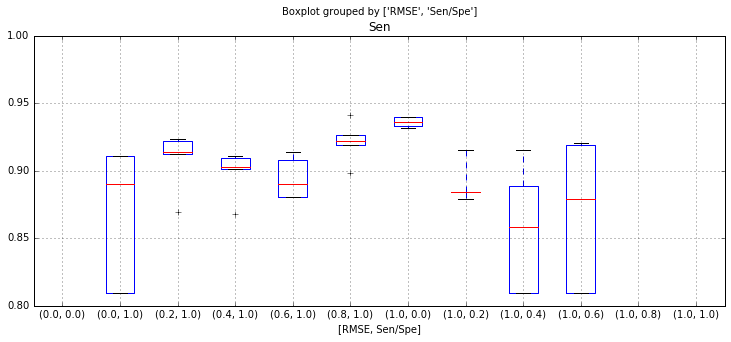

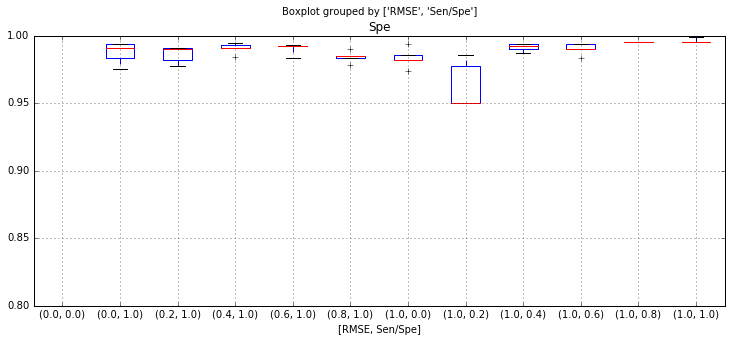

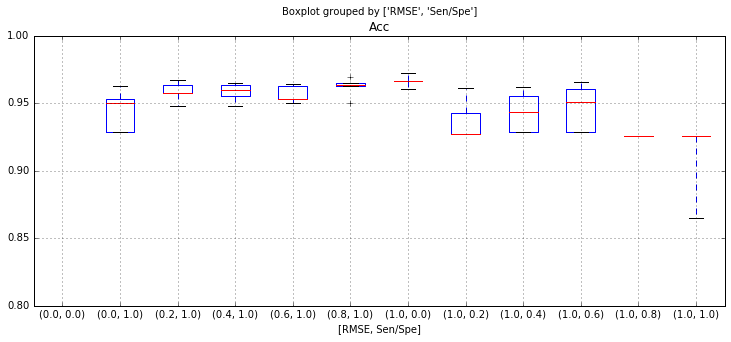

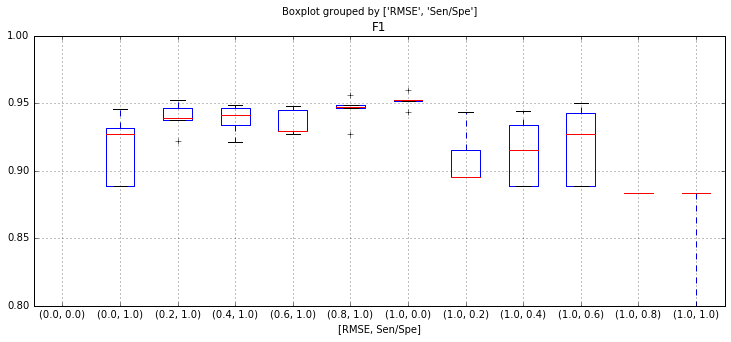

In [109]:
#mlbd
%pylab inline --no-import-all
import matplotlib.pyplot as plt
boxplotData=separateFilesByExpNew()
df=pd.DataFrame(data=boxplotData,columns=['RMSE', 'Sen/Spe', 'Sen', 'Spe', 'Acc', 'F1'])
Parm=['Sen', 'Spe', 'Acc', 'F1']
for c in Parm:
    #print c
    axes = df.boxplot(by=['RMSE','Sen/Spe'], column=c,figsize=[12,5],return_type='axes')
    for ax in axes.values():
        ax.set_ylim(0.80, 1)

    plt.show()

  <p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>1. </b></font>Analyze the results in the table and the boxplots. On this base, select weight values for the 3 studied parameters (RMSE, Sens, Spec)? Justify your choice?</p>

<b>Reponses</b>:
<p>La meilleure combinaison [RMSE,Sen/Spe] pour la critère Sensitivity : [1,0] </p>
<p>La meilleure combinaison [RMSE,Sen/Spe] pour la critère Specificity : [1,0.8]</p>
<p>La meilleure combinaison [RMSE,Sen/Spe] pour la critère Accurancy : [1,0] </p>
<p>La meilleure combinaison [RMSE,Sen/Spe] pour la critère F1 : [1,0] </p>
<p> Le choix des ces combinaisons ci-dessus est basé sur la position de boxplot et sa longueur. On choisi la combinaison qui a le boxplot tout en haut du graphe avec le longueur le plus petit (Plus le longeur est petit, plus on a moins de variation) </p>
<p>==> On a décidé de sélectionner la combinaison [1,0], car c'est la meilleure combinaison pour les criètres accurancy et F1. De plus, le F1 est un bon indicateur de trade off entre sensitivity et specificity</p>

Your answer here

### Exploring the effect of a size-based performance figure
To do this, first open the <i>DS_size.fs</i> script and change the weights of RMSE, sensitivity, and specificity to the values you selected in the previous step. Execute that script in FUGE.
#### Note: this script should run in less than a half of the time than the previous one. 

In [ ]:
#Default values
qtyExpGenerations = 1
qtyExpPop = 1
qtyExpRules = 1
qtyExpVar = 1
#Change here
alphaValuesSize = [0.2, 0.4, 0.6, 0.8, 1.0]
#Quantity of experiences by configuration
qtyExp = 5
#Path where it save your logs
pathLogs = "/home/mlbd/Desktop/mileRsltSize/logs"

In [ ]:
listLogs =  getFilesFuzzySystem(pathLogs, '/*.csv') 
print "Number of models: " + str(len(listLogs))

In [ ]:
matrixHeatMp = separateFilesByExpSize()

In [ ]:
fig = plt.figure()
fig.suptitle('Size', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Alpha values')
ax.set_ylabel('Fitness Value')
plt.plot(alphaValuesSize, matrixHeatMp[:,0], label="Sensitivity")
plt.plot(alphaValuesSize, matrixHeatMp[:,1], label="Specificity")
plt.plot(alphaValuesSize, matrixHeatMp[:,2], label="Accuracy")
plt.plot(alphaValuesSize, matrixHeatMp[:,3], label="F1")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2. </b></font>Based on the resulting statistics, what weight would you select for the Size performance criterion? Why?</p>

Your answer here

<b>For the curious: </b>Now you could create a script setting the fitness weights you have selected (i.e., those for RMSE, sensitivity, specificity, and size). You may, then, use it to perform multiples experiments exploring the space of other parameters, as for example, number of rules and variables per rule, number of generations, size of the populations, etc. You may, finally, analyse the results with the functions provided in this notebook. <p>
<i>Note: unfortunately this would certainly require a huge amount of computational power. So, do it only if you have access  to a small farm of servers ;-)</i>

In the second part of this practice you will enlarge the fuzzy model collection you just started in this firs part. Then, you will use all these models to make some decisions and choose a (handful of) highly predicitve model(s).

Good luck.